# <u><center>Naive Bayes Algorithms</center></u>


Naive Bayes models is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

As the name suggested Naive Bayes is based on **Bayes Theorem**. It assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as **naive.**

To understand math behind this algorithm check out this video: <a href="https://www.youtube.com/watch?v=jS1CKhALUBQ">Naive Bayes</a>

So here it is important to know what is Bayes theorem. 
Bayes’ Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes’ Theorem is stated as:


**P(class|data) = (P(data|class) * P(class)) / P(data)**

Where P(class|data) is the probability of class given the provided data.

    Lets get started with Naive Bayes. Here we will use data with collection of SMS messages. It contains 5572 records of different messages together with 747 spam messages.

`Use case:** You need to classify if a message is spam or not.`

Note : Download the dataset from your canvas account

Reference documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

In [1]:
#import pandas with alias pd
#import metrics
#import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve , auc

### Preparing Data


In [2]:
#Read SMSSpamCollection dataset
docs = pd.read_csv('SMSSpamCollection.csv')

In [3]:
#print first 5 records
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# counting spam and ham instances
spam=len(docs[docs.Class=='spam'])
ham=len(docs[docs.Class=='ham'])
#print ham_spam
print('spam ',spam)
print('ham ',ham)


spam  747
ham  4825


In [19]:
#print percentage of spam messages in your dataset
print(docs['Class'].value_counts(normalize=True))

ham     0.865937
spam    0.134063
Name: Class, dtype: float64


In [23]:
# mapping a column labels to ham as 0 and spam as 1
docs['label'] = docs.Class.map({'spam':1,'ham':0})
#print last 5 records of dataset
docs.tail()

,Class,sms,label
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


In [24]:
#Fetch all features 
X = docs['sms']

#Fetch label
y= docs['label']

#print shape of X and y
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [27]:
# import train_test_split
from sklearn.model_selection import train_test_split
# splitting into test and train with random state as 1 and test size as 25%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

## Naive Bayes in scikit-learn

scikit-learn implements three naive Bayes variants based on the same number of different probabilistic distributions: 
1. **Bernoulli :** This is a binary distribution useful when a feature can be present or absent.
2. **multinomial :**This is a discrete distribution used whenever a feature must be represented by a whole number (for example, in natural language processing, it can be the frequency of a term)
3.**Gaussian :** This is a continuous distribution characterized by its mean and variance.

So here you think, which variant will you be using for your problem statement


In [28]:
# print X_train first 5 records
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

### vectorization of words.

<p style='text-align: right;'> 20 points </p>


Here you can see that your features are in form of sequence of words or you can say sentences. Now to feed this information into our algorithm we need make it in form of numbers.

But how?
 
Sklearn has awesome library to extract features from text. This library is called CountVectorizer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Imagine breaking X in individual words and putting them all in a bag. Then we pick all the unique words from the bag one by one and make a dictionary of unique words. 

This is called **vectorization of words**. We have the class ```CountVectorizer()``` in scikit learn to vectorize the words. Let us first see it in action before explaining it further.

```Countvectorizer()``` will convert the documents into a set of unique words alphabetically sorted and indexed.
**Stop Words**

We can see a few trivial words such as  'and','is','of', etc. These words don't really make any difference in classyfying a document. These are called 'stop words'. So we would like to get rid of them. 

We can remove them by passing a parameter stop_words='english' while instantiating ```Countvectorizer()``` 




In [50]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Instantiate CountVectorizer with stop_words
vect = CountVectorizer(stop_words='english')

# fit vect on your feature text (X_train)
vect.fit(X_train)

CountVectorizer(stop_words='english')

Here ```vect``` is an object of class ```CountVectorizer()```. This has a method called  ```fit()``` which converts a corpus of documents into a vector of unique words as shown below.

Bam! So you have fit the features with X_train. Remember its not tranformed into vectors yet.

In [51]:
#check count of words in your features (Hint: Use vocabulary_ on CountVectorizer)
vect.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [52]:
#Check how feature names separately in form of words( Hint: Use get_feature_names function on  CountVectorizer)
vect.get_feature_names()

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07090298926',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08

Now let's transform our training features. 



In [54]:
# transform feature data
X_train_transformed = vect.transform(X_train)
X_test_tranformed = vect.transform(X_test)

In [55]:
#Now let's see how our X_train data looks like after tranformation ( hint: convert it into array and then print )
print(X_train_transformed.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
# printing length of feature names
print(len(vect.get_feature_names()))

7204


So our final dictionary is made of 7204 words (after discarding the stop words). Now, to do classification, we need to represent all the documents with respect to these words in the form of features. 

Every document will be converted into a *feature vector* representing presence of these words in that document. Let's convert each of our training documents in to a feature vector.



In [58]:
# Print shape of X_train_transformed
X_train_transformed.shape

(4179, 7204)

You can see X_tranformed is a 4179 x 7456 sparse matrix. It has 4179 rows for each of our 4179 documents and 7456 columns each 
for number of words of the dictionary which we just created. Let us print X_transformed.

In [59]:
#Print X_train_transformed
print(X_train_transformed)

  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6673)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7134)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


This representation can be understood as follows:

Consider first 4 rows of the output: (0,50), (0,264), (0,509) and (0,1552). It says that the first document (index 0) has 
50th , 264nd , 509th and 1552th 'word' present in the document, and that they appear only
once/twice in the document- indicated by the right hand column entry. 



In real problems, you often work with large documents and vocabularies, and each document contains only a few words in the vocabulary. So it would be a waste of space to store the vocabulary in a typical dataframe, since most entries would be zero. Also, matrix products, additions etc. are much faster with sparse matrices. That's why we use sparse matrices to store the data.




In [61]:
#Print feature names
vect.get_feature_names()

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07090298926',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08

In [62]:
'''converting X_train_transformed matrix to dataframe (Hint:X_train_transformed 
should be in an array form and columns as vector's feature name )'''
pd.DataFrame(X_train_transformed.toarray(),columns=vect.get_feature_names())


,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This table shows how many times a particular word occurs in document. In other words, this is a frequency table of the words.
A corpus of documents can thus be represented by a matrix with one row per document and one column per
token (e.g. word) occurring in the corpus.

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the "Bag of Words" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

#### So, the 4 steps for vectorization are as follows

- Import
- Instantiate
- Fit 
- Transform

Let us summarise all we have done till now:

- ```vect.fit(train)``` learns the vocabulary of the training data
- ```vect.transform(train)``` uses the fitted vocabulary to build a document-term matrix from the training data
- ```vect.transform(test)``` uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

## Applying Naive Bayes algorithm

Wohoo! so now you can see how your textual features are converted into feature vectors which are in numeric form. Alright, now you training data is ready to be fed into your algorithm

We will try using Bernoulli Naive Bayes algorithm first

Reference doc: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html


### 1. Bernoulli Naive Bayes


In [69]:
#import BernoulliNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit model on training dataset
bnb.fit(X_train_transformed,y_train)
# predict class of y
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability on y
y_pred_proba = bnb.predict_proba(X_test_tranformed)

# print accuracy score 
print(accuracy_score(y_test,y_pred_class))

0.9770279971284996


### Classification metrics

In [73]:
# get confusion metrics
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred_class)

#print confusion metrics
print(confusion)
#Get True negative, Flase positive, Flase negative and True positive using confusion metrics
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

[[1207    1]
 [  31  154]]


In [75]:
# Calculate sensitivity using confusion metrics
sensitivity = TP / float(FN + TP)

#Print sensitivity
print('sensitivity' ,sensitivity)

sensitivity 0.8324324324324325


In [76]:
# Calculate specificity using confusion metrics
specificity = TN / float(TN + FP)

#Print specificity
print('specificity' ,specificity)

specificity 0.9991721854304636


In [77]:
# Calculate precision using confusion metrics
precision = TP / float(TP + FP)

# print precision
print('precision' ,precision)


precision 0.9935483870967742


Let us print precision, recall and f1 score  using metrics sklearn library classification report

In [78]:
#import classification_report
from sklearn.metrics import classification_report

#Print Precision, recall, f1-score and support 
print(classification_report(y_test,y_pred_class))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1208
           1       0.99      0.83      0.91       185

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



Well done! we hope you remember what are these data science terminologies( precision, recall and f1-score) mean.


## Creating ROC curve


AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1


Reference doc: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html


In [81]:
# import roc_curve and and auc
from sklearn.metrics import roc_curve , auc

#Calculate false_positive_rate , true_positive_rate and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_proba[:,1])

#Calculate area under curve
roc_auc = auc(false_positive_rate,true_positive_rate)

In [82]:
#Print area under the curve
print(roc_auc)

0.9967692858421334


The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

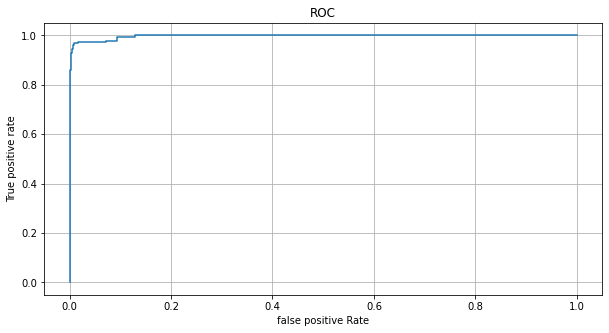

In [85]:
# plotting the ROC curve (false_positive_rate vs true_positive_rate )
plt.figure(figsize=(10,5))
plt.xlabel('false positive Rate')
plt.ylabel('True positive rate')
plt.plot(false_positive_rate,true_positive_rate)
plt.title('ROC')
plt.grid()
plt.show()

From above plot what do you understand? Getting little difficult to undertsand it? Don't worry check out this video and try to understand how your model has performed as per roc_auc curve.

Good job so far!

Now we will try out Multinomial Naive Bayes to solve this use case. SO let's get started.

Reference doc :<a href= "https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#:~:text=The%20multinomial%20Naive%20Bayes%20classifier,tf%2Didf%20may%20also%20work">sklearn document </a>

### 2. Multinomial Naive Bayes


In [86]:
# import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# instantiate bernoulli NB object
mnb = MultinomialNB()

# fit model on training dataset
mnb.fit(X_train_transformed,y_train)
# predict class of y
y_pred_class =  mnb.predict(X_test_tranformed)

# predict probability on y
y_pred_proba = mnb.predict_proba(X_test_tranformed)

# print accuracy score 
print(accuracy_score(y_test,y_pred_class))


0.9877961234745154


#### Evaluation metrics

In [87]:
# get confusion metrics
confusion = confusion_matrix(y_test,y_pred_class)

#print confusion metrics
print(confusion)
#Get True negative, Flase positive, Flase negative and True positive using confusion metrics
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

[[1201    7]
 [  10  175]]


Let us print precision, recall and f1 score  using metrics sklearn library classification report

In [88]:
#import classification_report
from sklearn.metrics import classification_report

#Print Precision, recall, f1-score and support 
print(classification_report(y_test,y_pred_class))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1208
           1       0.96      0.95      0.95       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



#### ROC curve


In [89]:
# import roc_curve and and auc
from sklearn.metrics import roc_curve , auc

#Calculate false_positive_rate , true_positive_rate and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_proba[:,1])

#Calculate area under curve
roc_auc = auc(false_positive_rate,true_positive_rate)


The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

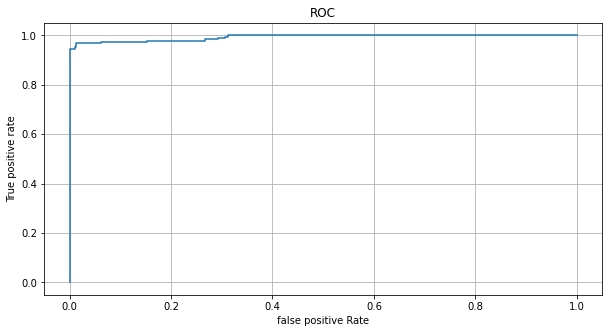

In [90]:
# plotting the ROC curve (false_positive_rate vs true_positive_rate )
plt.figure(figsize=(10,5))
plt.xlabel('false positive Rate')
plt.ylabel('True positive rate')
plt.plot(false_positive_rate,true_positive_rate)
plt.title('ROC')
plt.grid()
plt.show()


Though guassian naive bayes is applicable in this case, but still we try to implement guassian Niave Bayes as well here and see how differently it performs form the ohter two variant we already saw.

Reference doc: https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

### 3. Guassian Naive Bayes


In [93]:
# import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# instantiate bernoulli NB object
gnb = GaussianNB()

# fit model on training dataset
gnb.fit(X_train_transformed.toarray(),y_train)

# predict class of y
y_pred_class =  gnb.predict(X_test_tranformed.toarray())

# predict probability on y
y_pred_proba = gnb.predict_proba(X_test_tranformed.toarray())

# print accuracy score 
print(accuracy_score(y_test,y_pred_class))

0.8901651112706389


Note: If you get an error while doing above cell then just try to understand the code and try to change the code accordingly.

#### Evaluation metrics

In [94]:
# get confusion metrics
confusion = confusion_matrix(y_test,y_pred_class)

#print confusion metrics
print(confusion)

#Get True negative, Flase positive, Flase negative and True positive using confusion metrics
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

[[1066  142]
 [  11  174]]


Let us print precision, recall and f1 score  using metrics sklearn library classification report

In [95]:
#import classification_report
from sklearn.metrics import classification_report

#Print Precision, recall, f1-score and support 
print(classification_report(y_test,y_pred_class))


              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1208
           1       0.55      0.94      0.69       185

    accuracy                           0.89      1393
   macro avg       0.77      0.91      0.81      1393
weighted avg       0.93      0.89      0.90      1393



####  ROC Curve


In [96]:
# import roc_curve and and auc
from sklearn.metrics import roc_curve , auc

#Calculate false_positive_rate , true_positive_rate and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_proba[:,1])

#Calculate area under curve
roc_auc = auc(false_positive_rate,true_positive_rate)



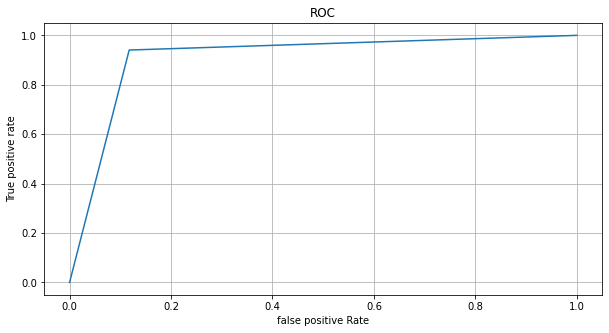

In [97]:
# plotting the ROC curve (false_positive_rate vs true_positive_rate )
plt.figure(figsize=(10,5))
plt.xlabel('false positive Rate')
plt.ylabel('True positive rate')
plt.plot(false_positive_rate,true_positive_rate)
plt.title('ROC')
plt.grid()
plt.show()



Do comment on above on the plot!


If you will see all three variant result of Naive Bayes, performance of multinomial is better than the other two variant.

Let's print accuracy of all three below:


<p style='text-align: right;'> 10 points </p>


In [104]:
# print accuracy score of all three Naive Bayes algorithms.
print('Burnouli    :',accuracy_score(y_test, bnb.predict(X_test_tranformed.toarray())))
print('Multinomial :',accuracy_score(y_test, mnb.predict(X_test_tranformed.toarray())))
print('Guassian    :',accuracy_score(y_test, gnb.predict(X_test_tranformed.toarray())))


Burnouli    : 0.9770279971284996
Multinomial : 0.9877961234745154
Guassian    : 0.8901651112706389


And hence it's proved that Multinomial Naive Bayes would solve this usecase of classifying spam messages correctly. 

So here with this conclusion that Multinomial works better here because frequency of each feature word has occured more than once in many cases, and hence multinomial fits  better in this case compared to Burnoulli and guassian Naive Bayes

So well Done. We are very happy with your work and so we provide you a bonus video on interview questions on Naive Bayes


We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.
